<a href="https://colab.research.google.com/github/sunshineluyao/design-principle-blockchain/blob/main/code/NLP_Blockchain_Whitepapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Set-up

In [78]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
pip install igviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import pandas as pd
import numpy as np

In [81]:
df = pd.read_csv("https://raw.githubusercontent.com/sunshineluyao/design-principle-blockchain/main/data/whitepaper.csv")
df

Rank                     name symbol  Genesis         Type  \
0       1                Bitcoin     BTC     2009   Blockchain   
1       2                Ethereum    ETH     2015   Blockchain   
2       3     Binance smart chain    BNB     2017   Blockchain   
3       4     XRP Ledger (Ripple)    XRP     2021   Blockchain   
4       5                 Cardano    ADA     2017   Blockchain   
5       6                Polkadot    DOT     2022  Cross-chain   
6       7                    TRON    TRX     2017   Blockchain   
7       8                  Solana    SOL     2020   Blockchain   
8       9               Avalanche   AVAX     2020   Blockchain   
9      10               Chainlink   LINK     2017  Cross-chain   
10     11  The Open Network (TON)    TON     2018   Blockchain   
11     12                  Cosmos   ATOM     2016  Cross-chain   
12     13                 Stellar    XLM     2015   Blockchain   
13     14            Cronos Chain    CRO     2018   Blockchain   
14     15        Quant Overledger    QNT     2018  Cross-chain   
15     16                 Agorand   ALGO     2019   Blockchain   
16     17           NEAR Protocol   NEAR     2021   Blockchain   
17     18                Filecoin    FIL     2017  Cross-chain   
18     19                  Hedera   HBAR     2019   Blockchain   
19     20       Internet Computer    ICP     2021   Blockchain   
20     21             EOS Network    EOS     2018   Blockchain   
21     22    MultiversX (Elrond)    EGLD     2020   Blockchain   
22     23                    Flow   FLOW     2018   Blockchain   
23     24           Theta Network  THETA     2019   Blockchain   
24     25                   Tezos    XTZ     2018   Blockchain   
25     26                   Zcash    ZEC     2016   Blockchain   
26     27                  Klaytn   KLAY     2019   Blockchain   
27     28                    Dash   DASH     2014   Blockchain   

                                        Coinmarketcap  \
0       https://coinmarketcap.com/currencies/bitcoin/   
1      https://coinmarketcap.com/currencies/ethereum/   
2           https://coinmarketcap.com/currencies/bnb/   
3           https://coinmarketcap.com/currencies/xrp/   
4       https://coinmarketcap.com/currencies/cardano/   
5   https://coinmarketcap.com/currencies/polkadot-...   
6          https://coinmarketcap.com/currencies/tron/   
7        https://coinmarketcap.com/currencies/solana/   
8     https://coinmarketcap.com/currencies/avalanche/   
9     https://coinmarketcap.com/currencies/chainlink/   
10      https://coinmarketcap.com/currencies/toncoin/   
11       https://coinmarketcap.com/currencies/cosmos/   
12      https://coinmarketcap.com/currencies/stellar/   
13       https://coinmarketcap.com/currencies/cronos/   
14        https://coinmarketcap.com/currencies/quant/   
15     https://coinmarketcap.com/currencies/algorand/   
16  https://coinmarketcap.com/currencies/near-prot...   
17     https://coinmarketcap.com/currencies/filecoin/   
18       https://coinmarketcap.com/currencies/hedera/   
19  https://coinmarketcap.com/currencies/internet-...   
20          https://coinmarketcap.com/currencies/eos/   
21  https://coinmarketcap.com/currencies/elrond-egld/   
22         https://coinmarketcap.com/currencies/flow/   
23  https://coinmarketcap.com/currencies/theta-net...   
24        https://coinmarketcap.com/currencies/tezos/   
25        https://coinmarketcap.com/currencies/zcash/   
26       https://coinmarketcap.com/currencies/klaytn/   
27         https://coinmarketcap.com/currencies/dash/   

                                           whitepaper  \
0                     https://bitcoin.org/bitcoin.pdf   
1                 https://ethereum.org/en/whitepaper/   
2   https://github.com/binance-chain/whitepaper/bl...   
3   https://ripple.com/files/ripple_consensus_whit...   
4                 https://docs.cardano.org/en/latest/   
5          https://polkadot.network/PolkaDotPaper.pdf   
6   https://tron.network/static/doc/

# Part I The World Cloud

## 1.1. Title

In [82]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'Bitcoin: A Peer-to-Peer Electronic Cash System,Ethereum Whitepaper: A Next-Generation Smart Contract and Decentralized Application Platform,BNB Smart Chain: A Parallel Blockchain to Beacon Chain to Enable Smart Contracts,The Ripple Protocol Consensus Algorithm,Why Cardano: The original essay for 2017 outlining the background, philosophy and inspiration behind the Cardano blockchain,Polkadot: vision for a heterogenous multi-chain framework,TRON: Advanced Decentralized Blockchain Platform,Solana: A new architecture for a high performance blockchain v0.8.13,Avalanche Native Token ($AVAX) Dynamics,Chainlink 2.0: Next Steps in the Evolution of Decentralized Oracle Networks,The Open Network,Cosmos Whitepaper: A Network of Distributed Ledgers,The Stellar Consensus Protocol: A Federated Model for Internet-level Consensus,Cronos Whitepaper,Quant Overledger Whitepaper,Algorand: Scaling Byzantine Agreements for Cryptocurrencies,The NEAR whitepaper,Filecoin: A Decentralized Storage Network,Hedera

In [83]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
stop_words = stopwords.words('english')
stop_words.extend([',',"SoK","survey",":","A","on","in","into","the","for","review","white","paper","whitepaper"])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [85]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

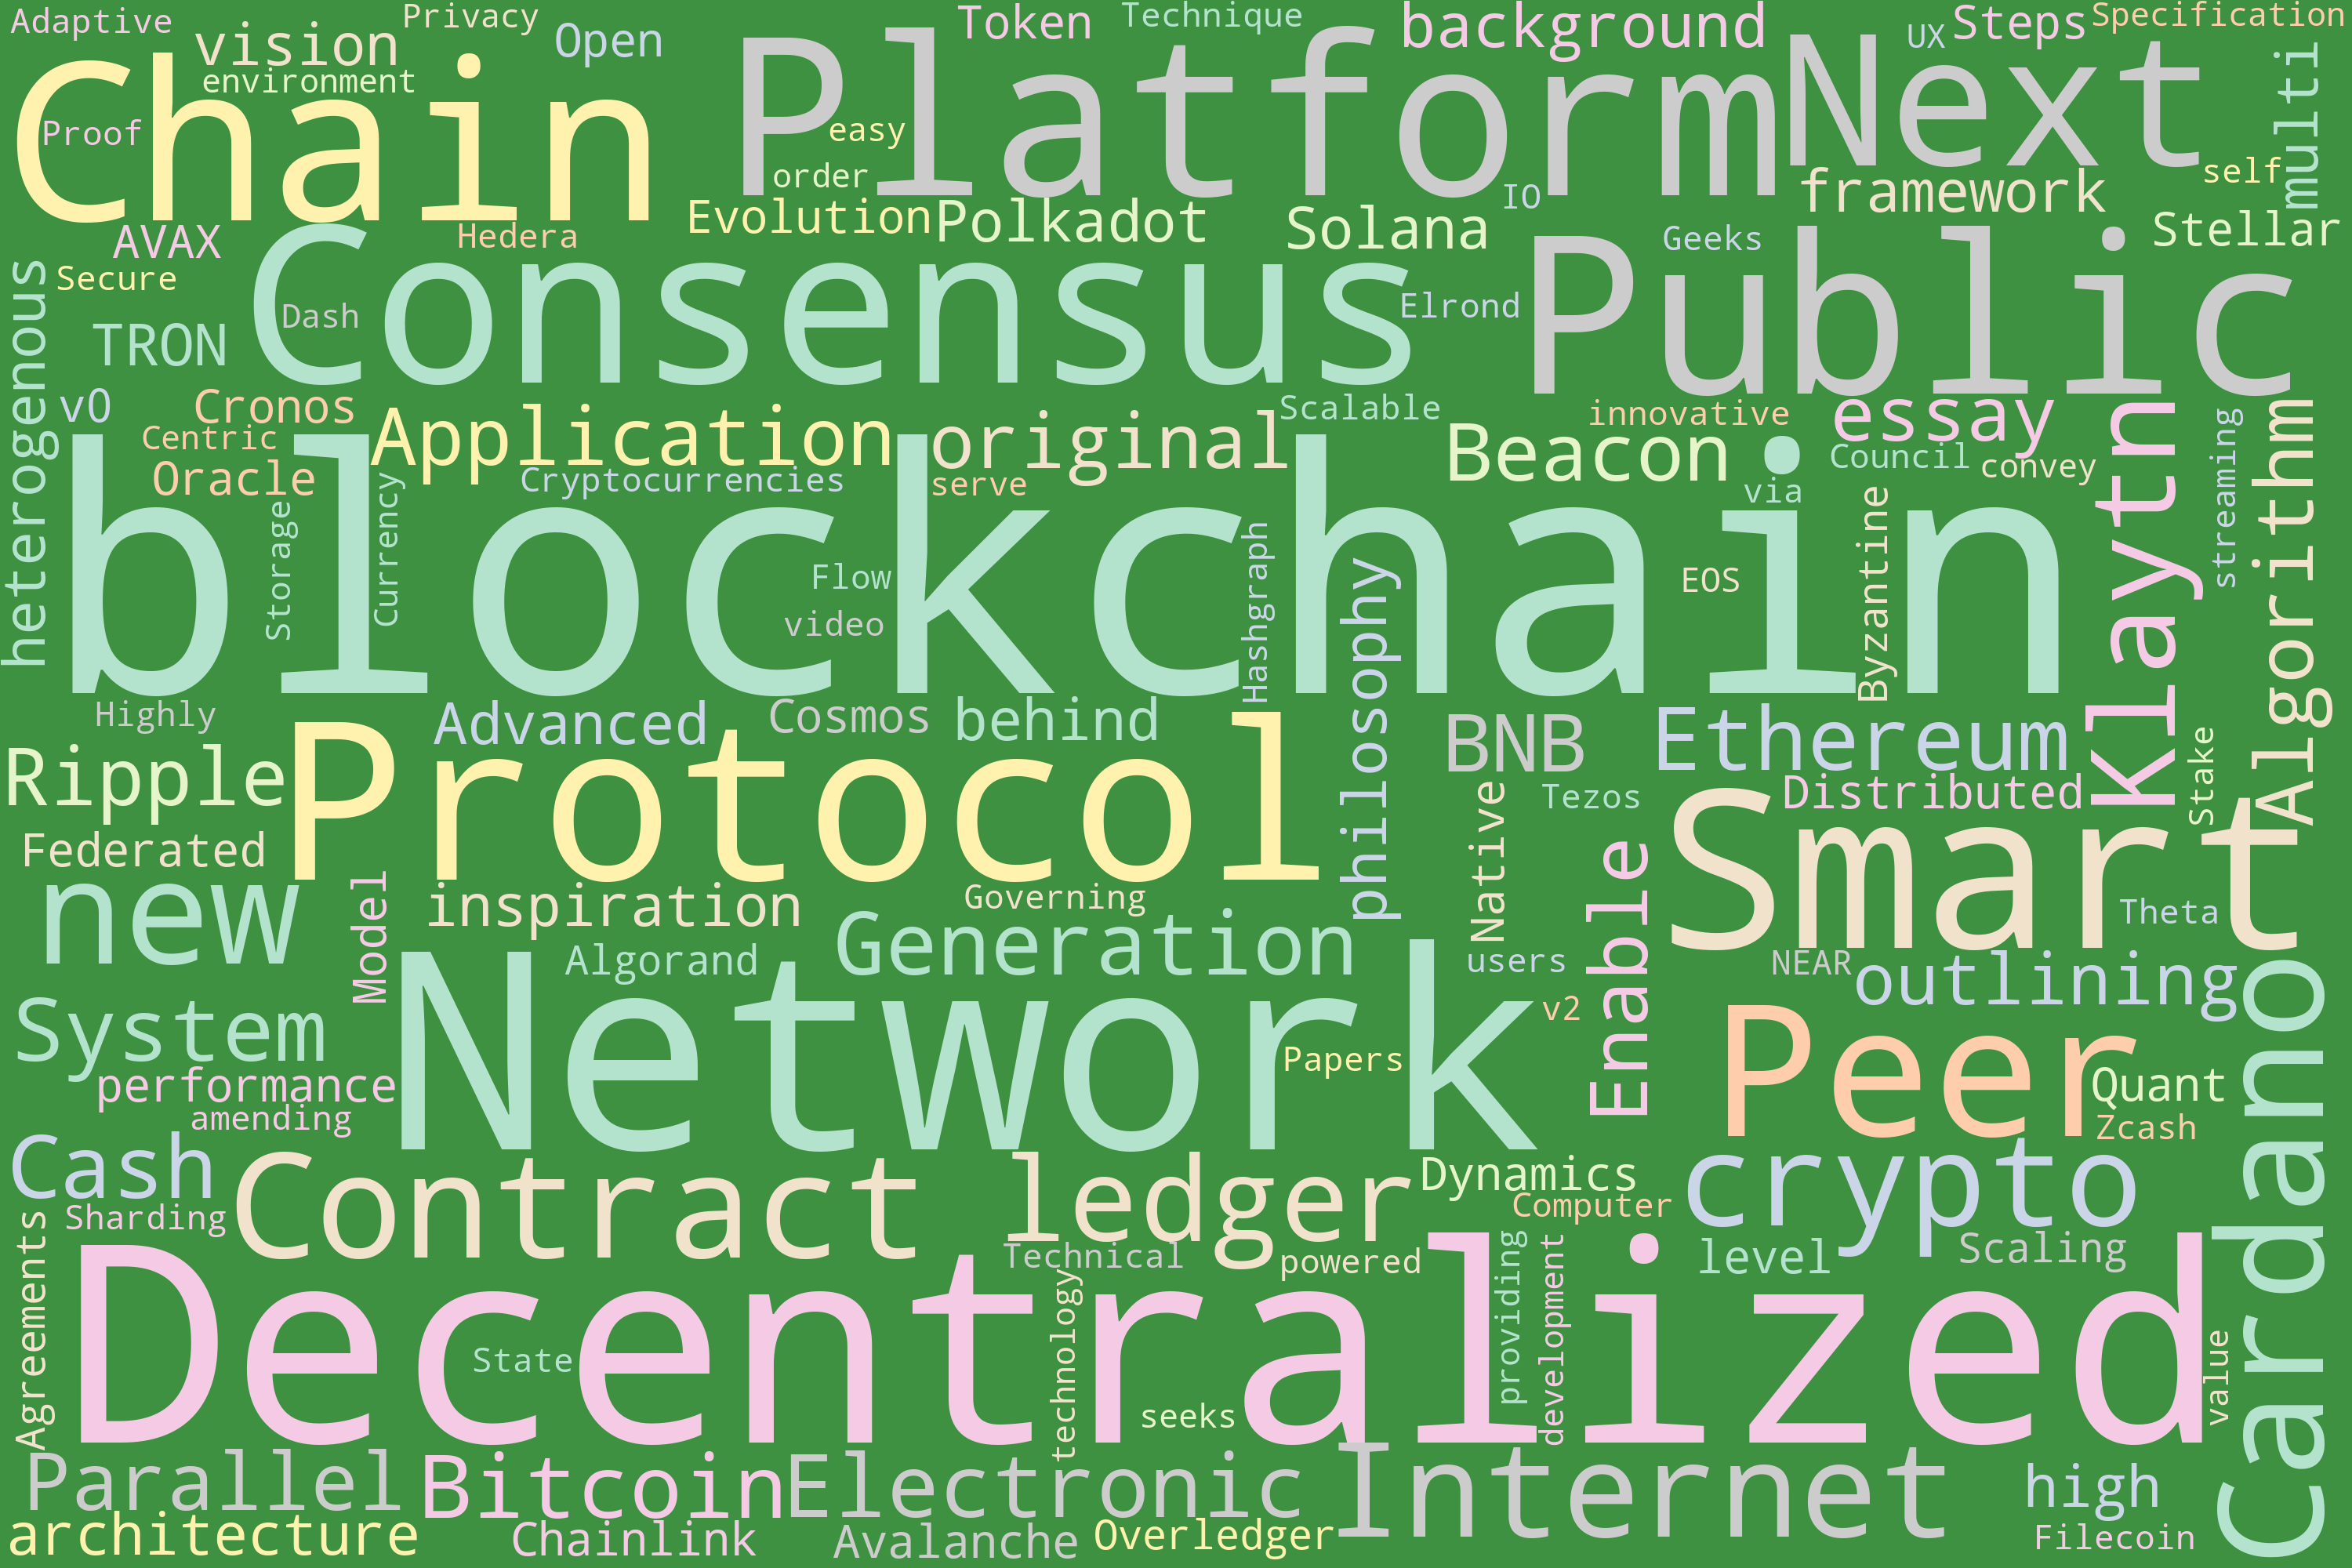

In [86]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

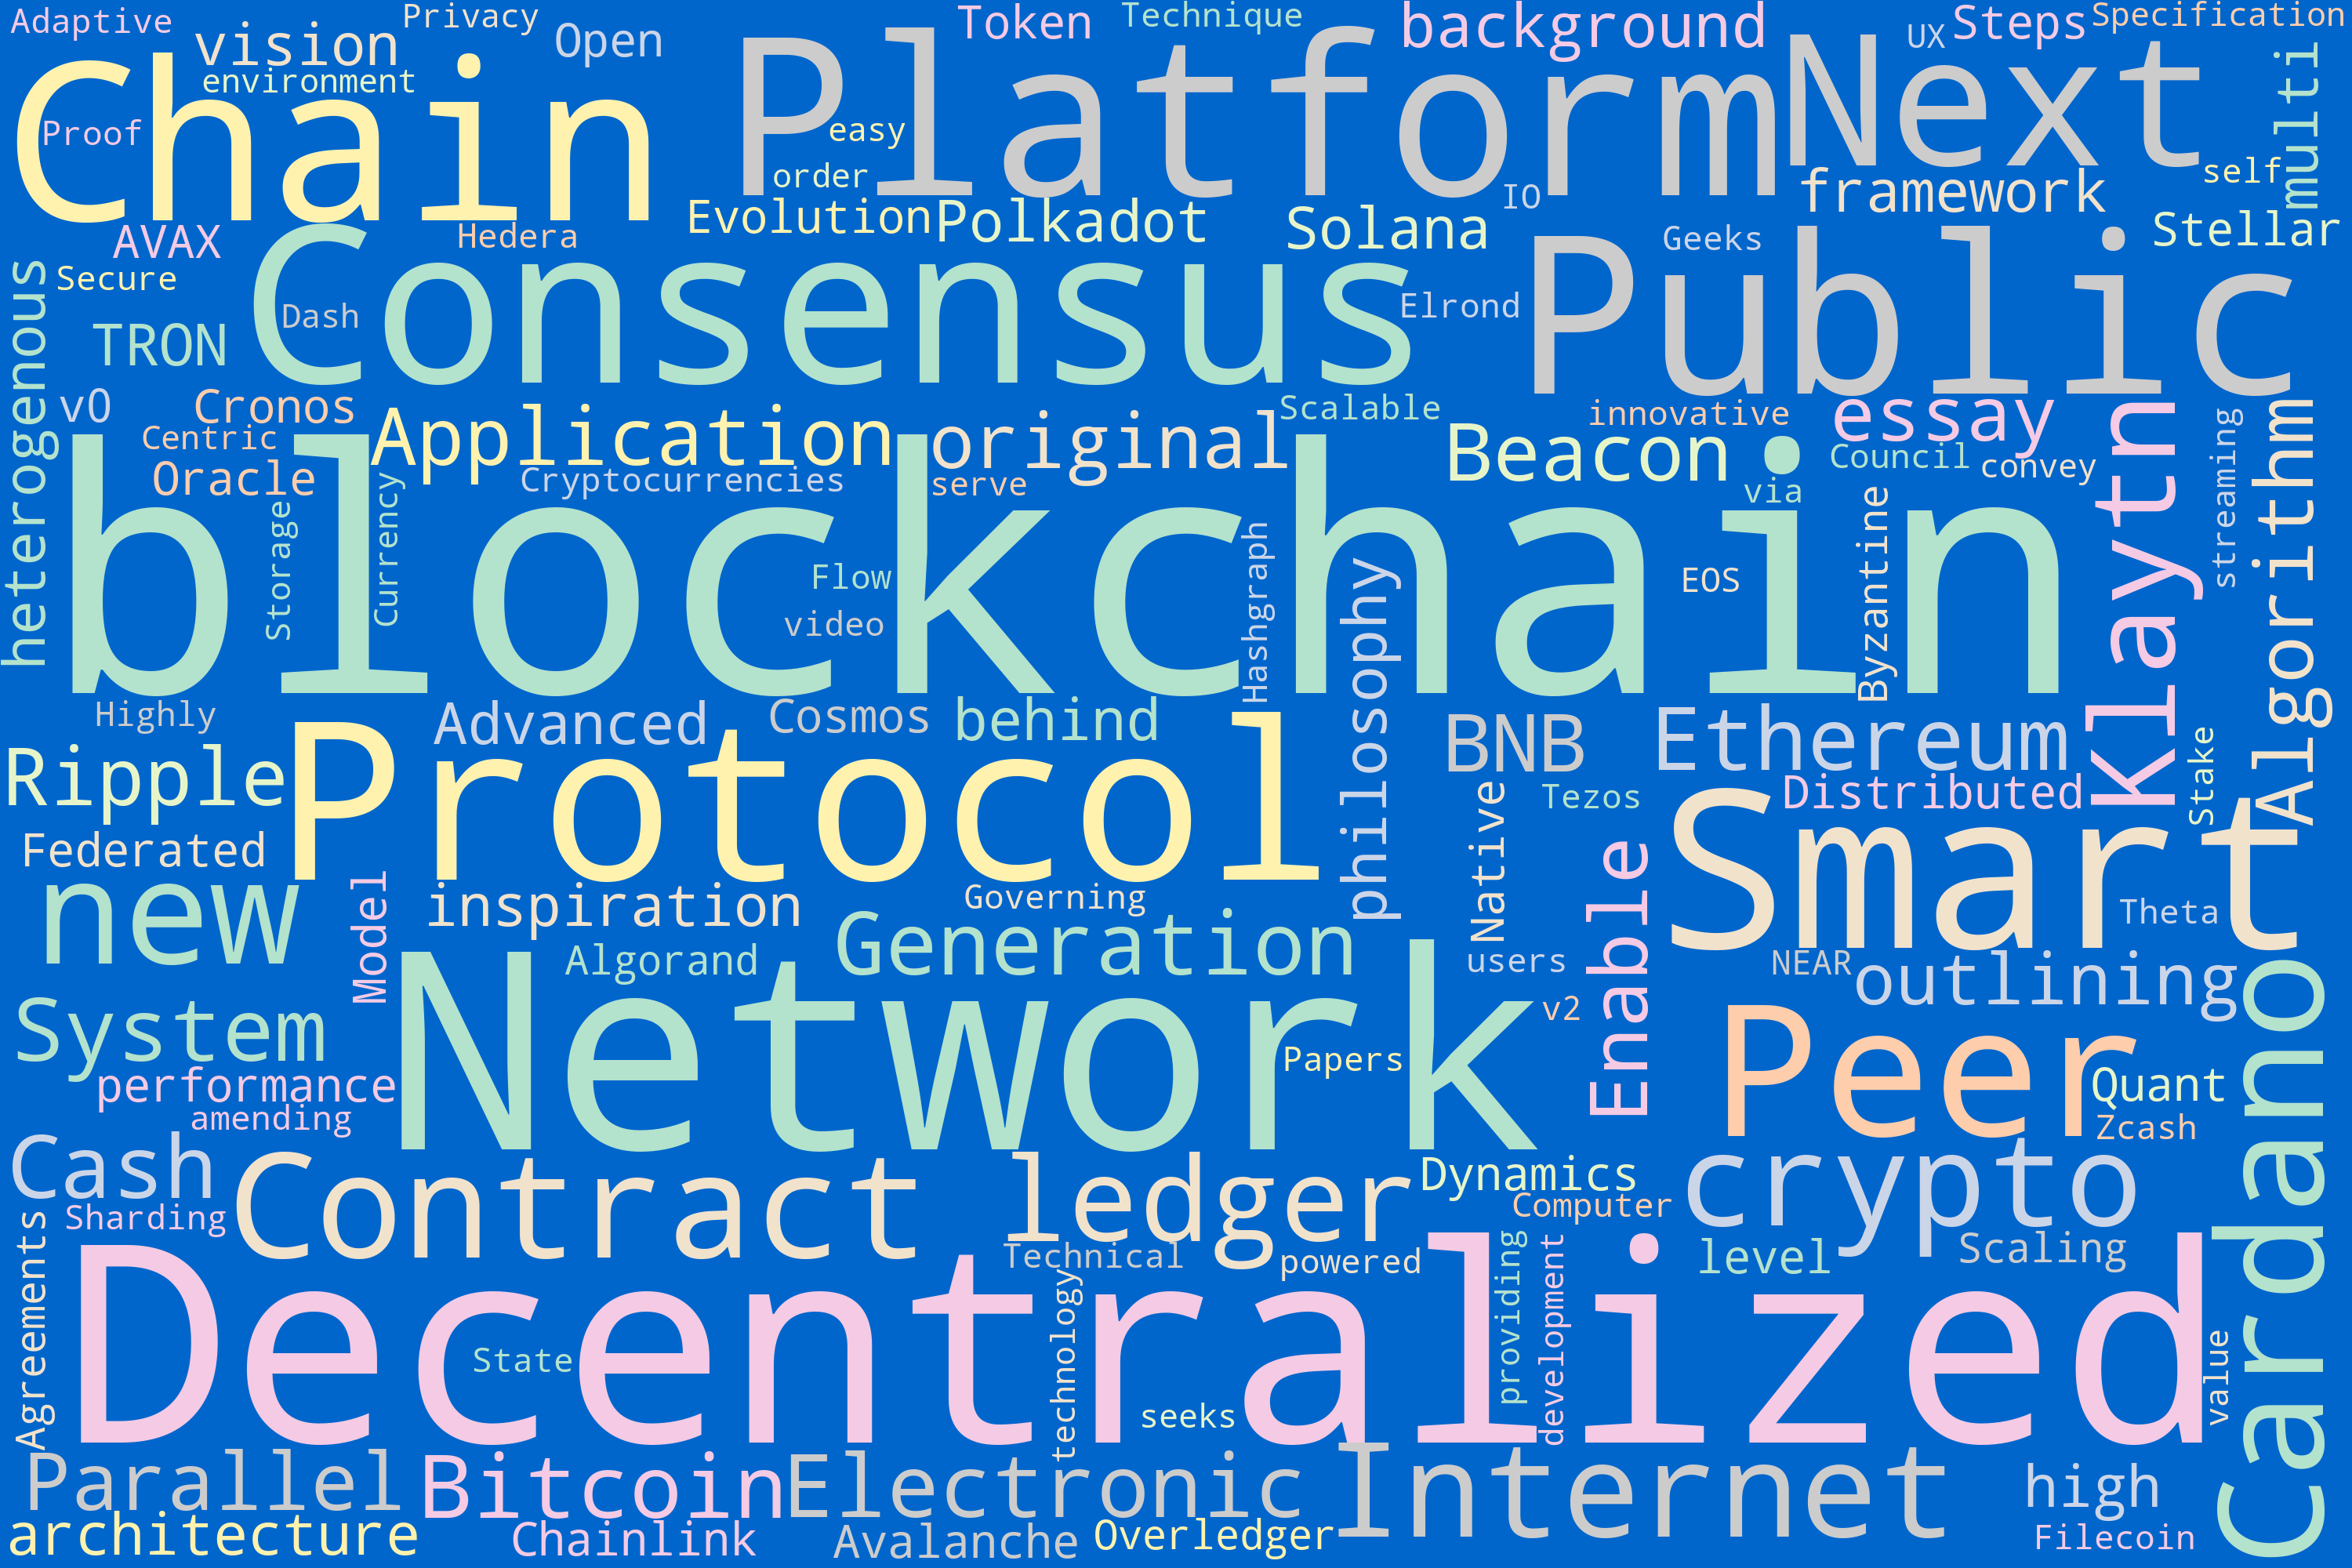

In [87]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [88]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

'A purely peer-to-peer version of electronic cash would allow online payments to be sent directly from one party to another without going through a financial institution.  Digital signatures provide part of the solution, but the main benefits are lost if a trusted third party is still required to prevent double-spending. We propose a solution to the double-spending problem using a peer-to-peer network. The network timestamps transactions by hashing them into an ongoing chain of hash-based proof-of-work, forming a record that cannot be changed without redoing the proof-of-work.  The longest chain not only serves as proof of the sequence of events witnessed, but proof that it came from the largest pool of CPU power.  As long as a majority of CPU power is controlled by nodes that are not cooperating to attack the network, they\'ll generate the longest chain and outpace attackers.  The network itself requires minimal structure.  Messages are broadcast on a best effort basis, and nodes can 

In [89]:
stop_words = stopwords.words('english')
stop_words.extend(['.'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

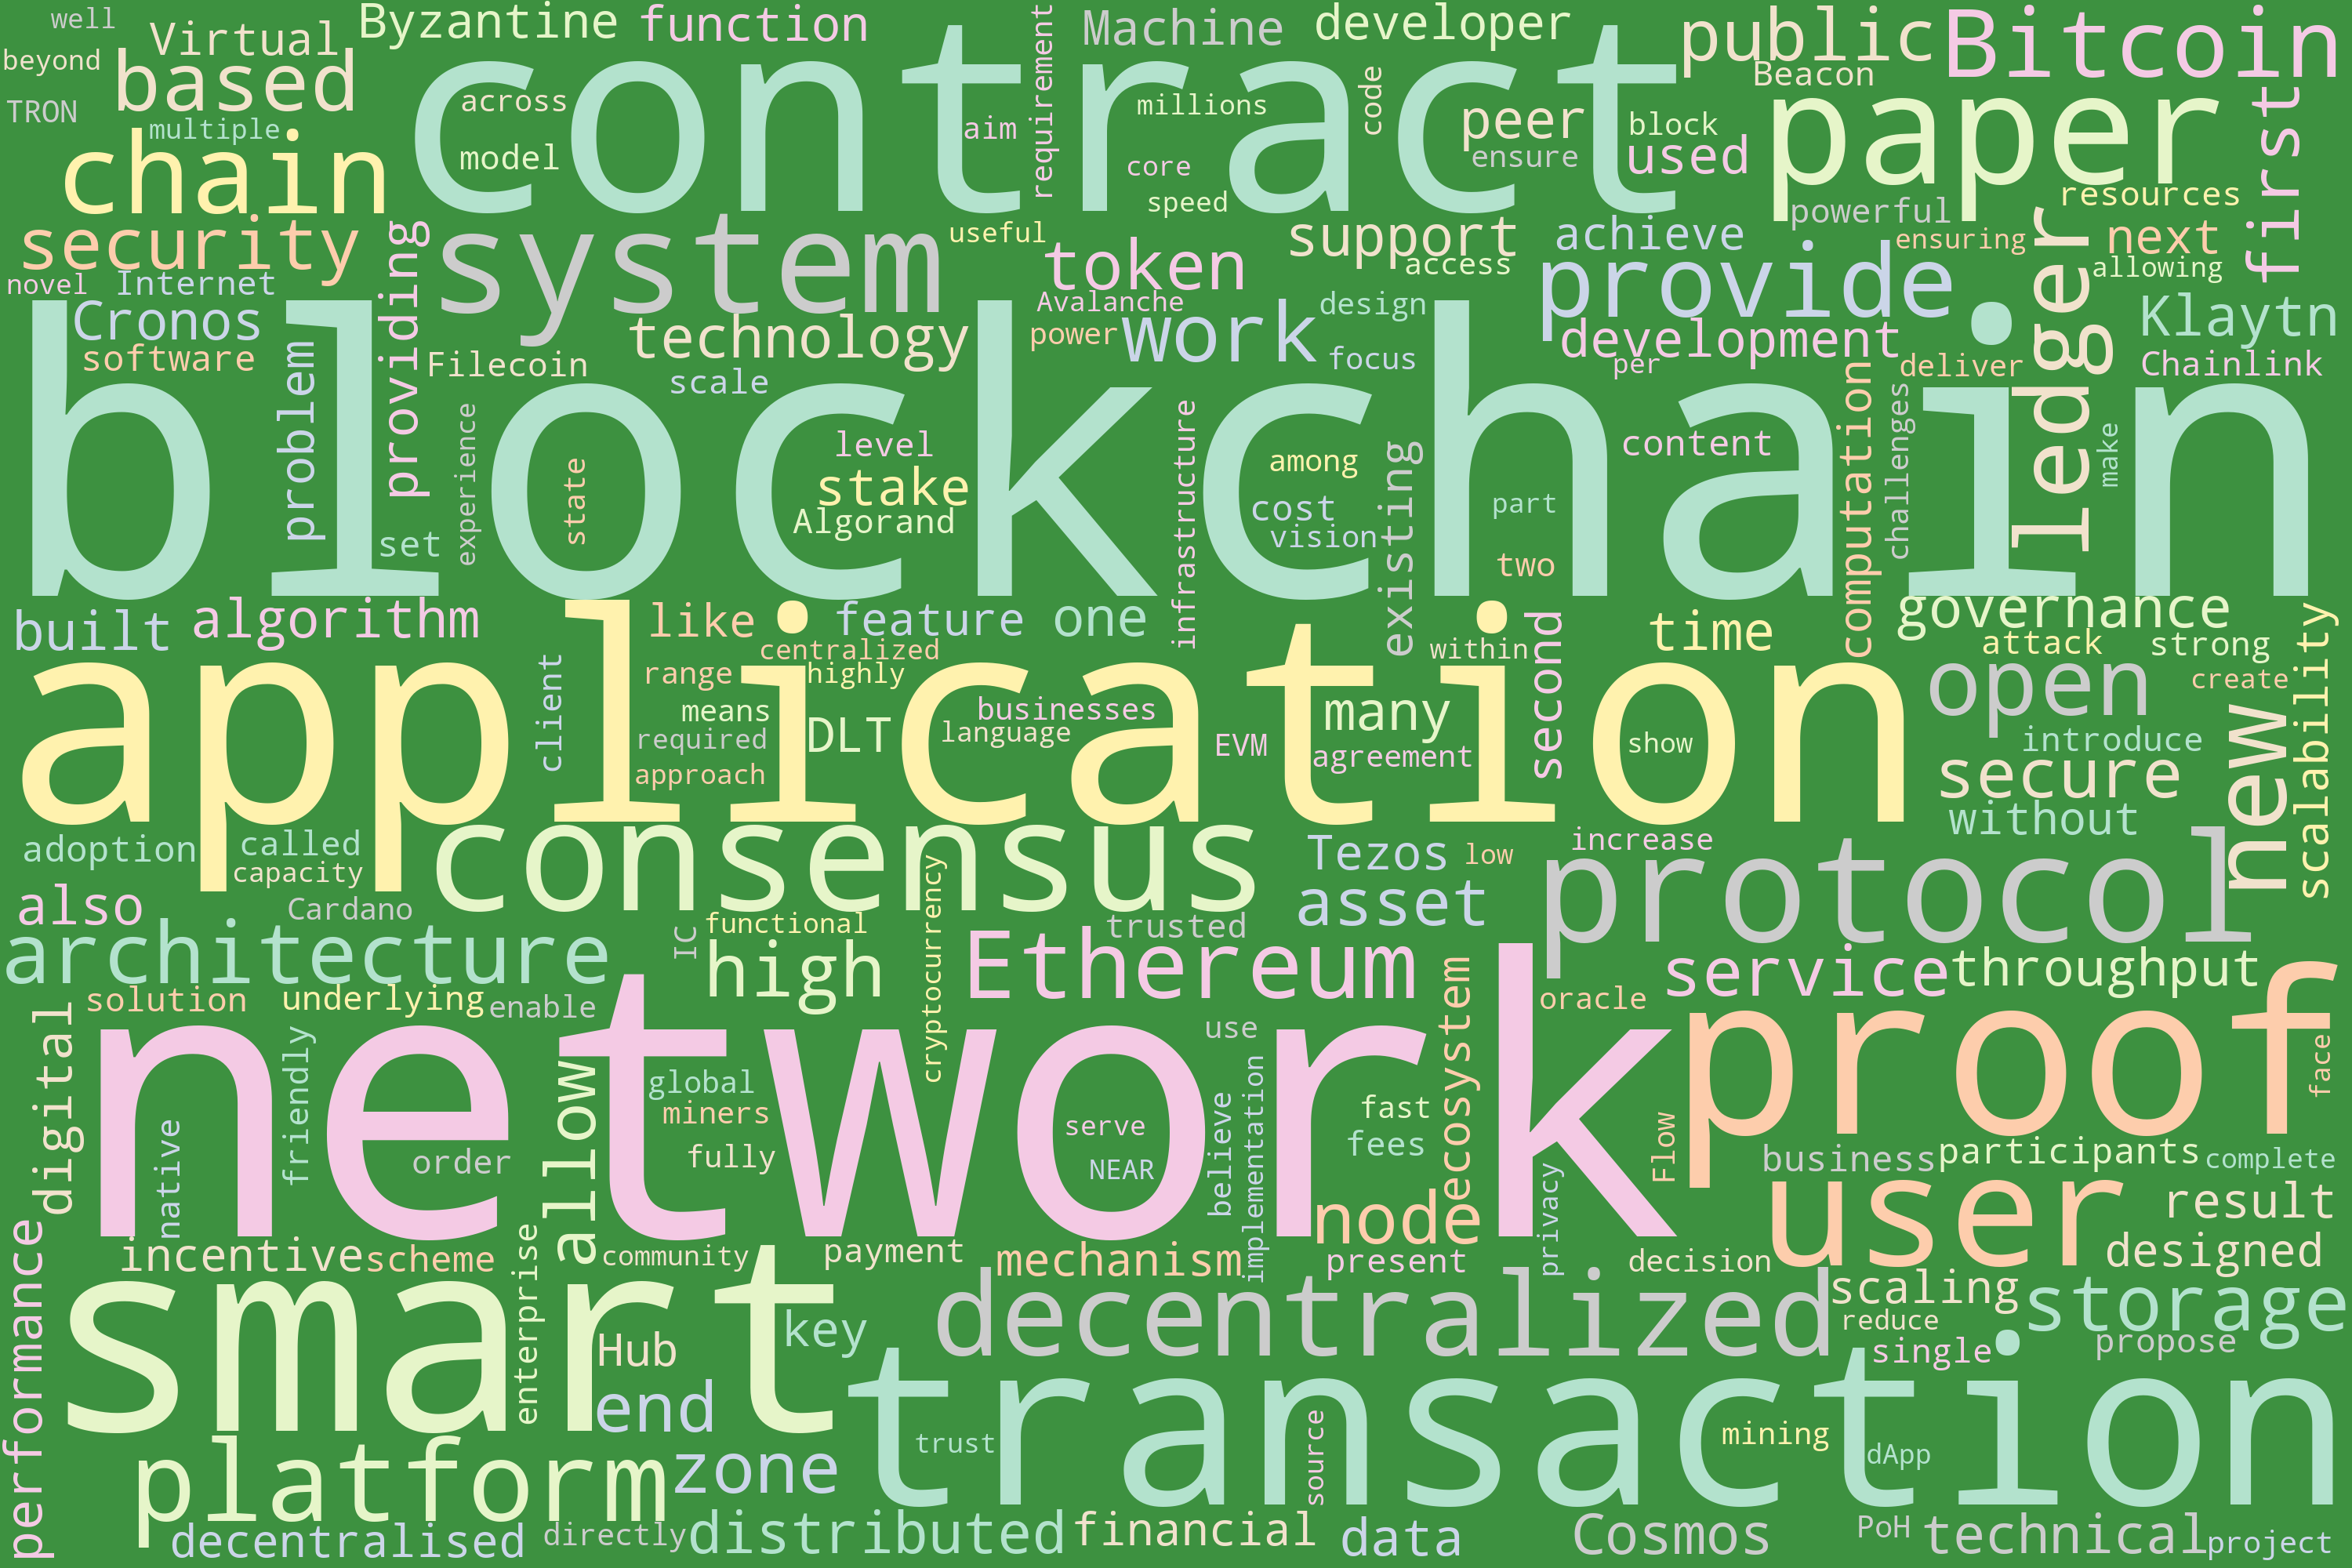

In [90]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

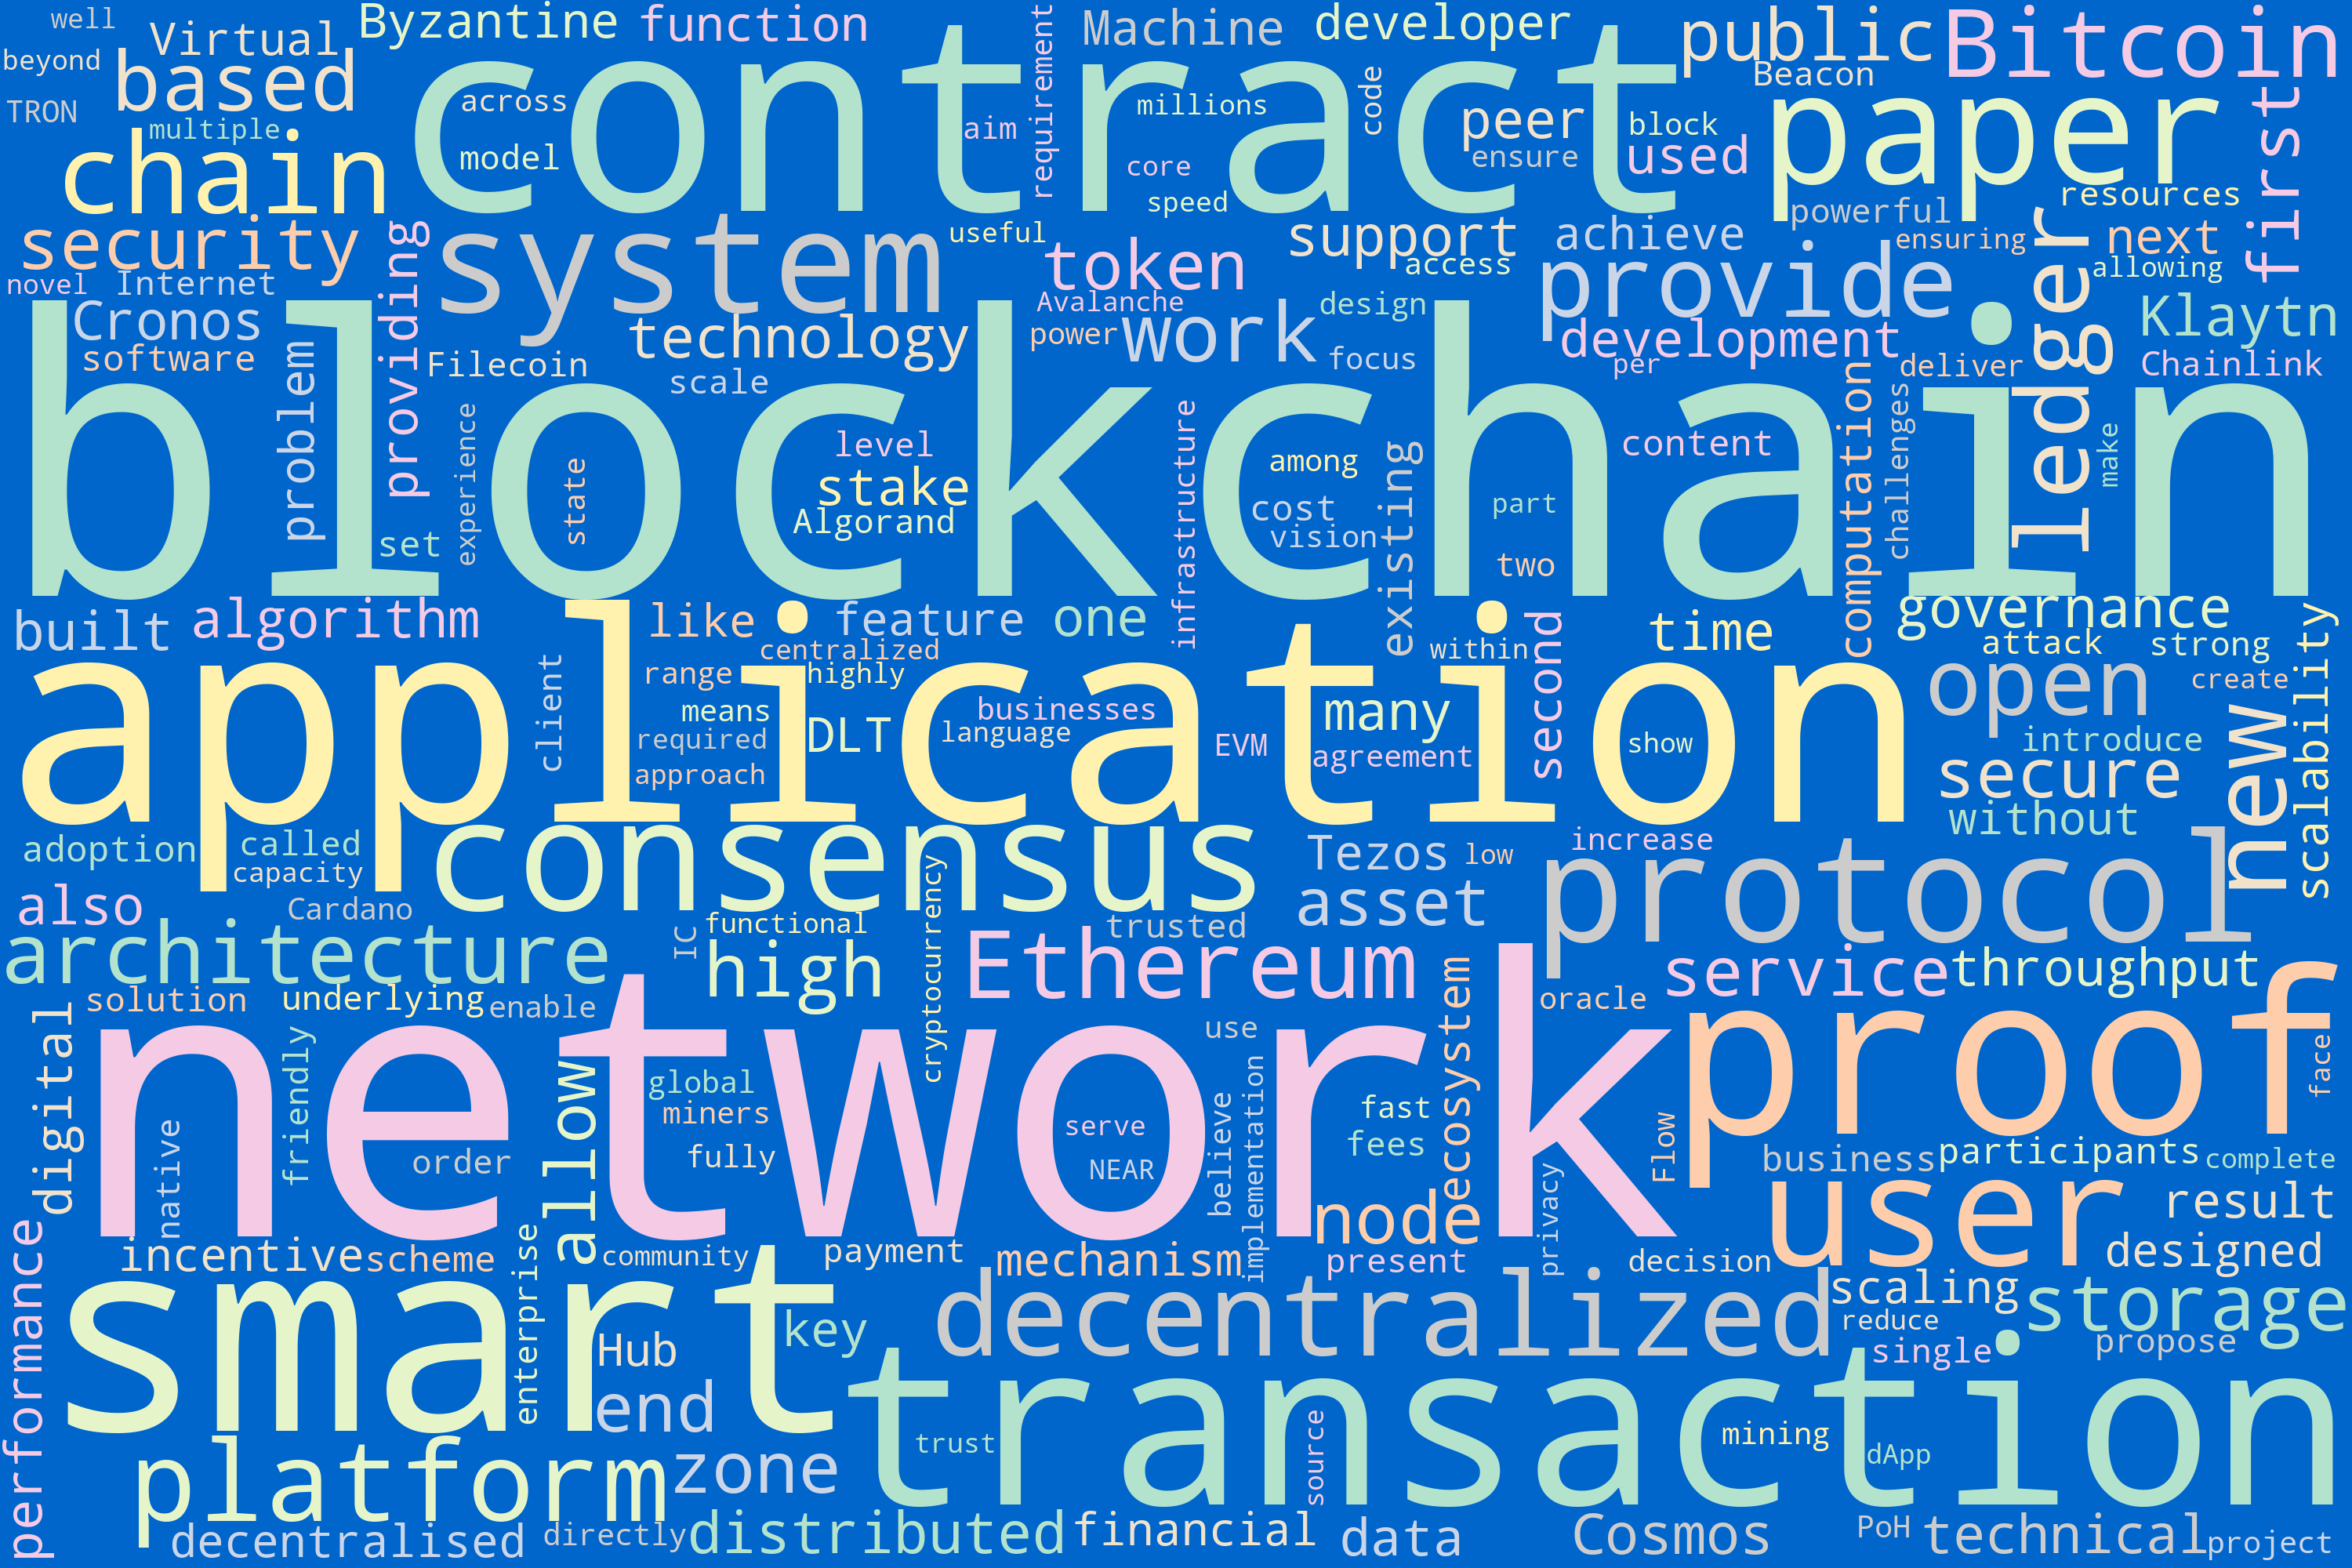

In [91]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [15]:
df.columns

Index(['Rank ', 'name', 'symbol', 'Genesis', 'Type', 'Coinmarketcap',
       'whitepaper', 'Title', 'Abstract'],
      dtype='object')

In [16]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [17]:
df_Title  = df['Title'].str.lower()

In [43]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles =Titles.replace("$"," ")
Titles

'bitcoin  peer-to-peer electronic cash system  ethereum whitepaper  next-generation smart contract and decentralized application platform  bnb smart chain  parallel blockchain to beacon chain to enable smart contracts  the ripple protocol consensus algorithm  why cardano  the original essay for outlining the background, philosophy and inspiration behind the cardano blockchain  polkadot  vision for heterogenous multi-chain framework  tron  advanced decentralized blockchain platform  solana  new architecture for high performance blockchain v0 avalanche native token   avax  dynamics  chainlink next steps in the evolution of decentralized oracle networks  the open network  cosmos whitepaper  network of distributed ledgers  the stellar consensus protocol  federated model for internet-level consensus  cronos whitepaper  quant overledger whitepaper  algorand  scaling byzantine agreements for cryptocurrencies  the near whitepaper  filecoin  decentralized storage network  hedera  public hashgra

In [44]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [45]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [46]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [48]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['bitcoin',
 'peer-to-peer',
 'electronic',
 'cash',
 'system',
 'ethereum',
 'whitepaper',
 'next-generation',
 'smart',
 'contract',
 'and',
 'decentralized',
 'application',
 'platform',
 'bnb',
 'smart',
 'chain',
 'parallel',
 'blockchain',
 'to',
 'beacon',
 'chain',
 'to',
 'enable',
 'smart',
 'contract',
 'the',
 'ripple',
 'protocol',
 'consensus',
 'algorithm',
 'why',
 'cardano',
 'the',
 'original',
 'essay',
 'for',
 'outlining',
 'the',
 'background,',
 'philosophy',
 'and',
 'inspiration',
 'behind',
 'the',
 'cardano',
 'blockchain',
 'polkadot',
 'vision',
 'for',
 'heterogenous',
 'multi-chain',
 'framework',
 'tron',
 'advanced',
 'decentralized',
 'blockchain',
 'platform',
 'solana',
 'new',
 'architecture',
 'for',
 'high',
 'performance',
 'blockchain',
 'v0',
 'avalanche',
 'native',
 'token',
 'avax',
 'dynamic',
 'chainlink',
 'next',
 'step',
 'in',
 'the',
 'evolution',
 'of',
 'decentralized',
 'oracle',
 'network',
 'the',
 'open',
 'network',
 'cosmos',


In [54]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','white','paper']]
words_nsw

['bitcoin',
 'peer-to-peer',
 'electronic',
 'cash',
 'system',
 'ethereum',
 'whitepaper',
 'next-generation',
 'smart',
 'contract',
 'decentralized',
 'application',
 'platform',
 'bnb',
 'smart',
 'chain',
 'parallel',
 'blockchain',
 'beacon',
 'chain',
 'enable',
 'smart',
 'contract',
 'ripple',
 'protocol',
 'consensus',
 'algorithm',
 'cardano',
 'original',
 'essay',
 'outlining',
 'background,',
 'philosophy',
 'inspiration',
 'behind',
 'cardano',
 'blockchain',
 'polkadot',
 'vision',
 'heterogenous',
 'multi-chain',
 'framework',
 'tron',
 'advanced',
 'decentralized',
 'blockchain',
 'platform',
 'solana',
 'new',
 'architecture',
 'high',
 'performance',
 'blockchain',
 'v0',
 'avalanche',
 'native',
 'token',
 'avax',
 'dynamic',
 'chainlink',
 'next',
 'step',
 'evolution',
 'decentralized',
 'oracle',
 'network',
 'open',
 'network',
 'cosmos',
 'whitepaper',
 'network',
 'distributed',
 'ledger',
 'stellar',
 'consensus',
 'protocol',
 'federated',
 'model',
 'inter

In [55]:
import collections

In [56]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [57]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(25)

bigram  counts
0            (smart, contract)       2
2         (public, blockchain)       2
1       (blockchain, platform)       2
98        (hashgraph, network)       1
97         (public, hashgraph)       1
72           (ledger, stellar)       1
71       (distributed, ledger)       1
70      (network, distributed)       1
69       (whitepaper, network)       1
68        (cosmos, whitepaper)       1
67           (network, cosmos)       1
66             (open, network)       1
65             (network, open)       1
64           (oracle, network)       1
63     (decentralized, oracle)       1
62  (evolution, decentralized)       1
61           (step, evolution)       1
60                (next, step)       1
59           (chainlink, next)       1
58        (dynamic, chainlink)       1
57             (avax, dynamic)       1
56               (token, avax)       1
55             (native, token)       1
54         (avalanche, native)       1
53             (v0, avalanche)       1

In [53]:
print(title_bigram.head(25).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                    bigram &  counts \\
\midrule
         (smart, contract) &       2 \\
      (public, blockchain) &       2 \\
    (blockchain, platform) &       2 \\
            (white, paper) &       2 \\
       (public, hashgraph) &       1 \\
         (ledger, stellar) &       1 \\
     (distributed, ledger) &       1 \\
    (network, distributed) &       1 \\
     (whitepaper, network) &       1 \\
      (cosmos, whitepaper) &       1 \\
         (network, cosmos) &       1 \\
           (open, network) &       1 \\
           (network, open) &       1 \\
         (oracle, network) &       1 \\
   (decentralized, oracle) &       1 \\
(evolution, decentralized) &       1 \\
         (step, evolution) &       1 \\
              (next, step) &       1 \\
         (chainlink, next) &       1 \\
      (dynamic, chainlink) &       1 \\
           (avax, dynamic) &       1 \\
             (token, avax) &       1 \\
           (native, token) &       1 \\
  

In [29]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                         |   counts |
|:-------------------------------|---------:|
| ('smart', 'contract')          |        2 |
| ('public', 'blockchain')       |        2 |
| ('blockchain', 'platform')     |        2 |
| ('white', 'paper')             |        2 |
| ('public', 'hashgraph')        |        1 |
| ('ledger', 'stellar')          |        1 |
| ('distributed', 'ledger')      |        1 |
| ('network', 'distributed')     |        1 |
| ('whitepaper', 'network')      |        1 |
| ('cosmos', 'whitepaper')       |        1 |
| ('network', 'cosmos')          |        1 |
| ('open', 'network')            |        1 |
| ('network', 'open')            |        1 |
| ('oracle', 'network')          |        1 |
| ('decentralized', 'oracle')    |        1 |
| ('evolution', 'decentralized') |        1 |
| ('step', 'evolution')          |        1 |
| ('next', 'step')               |        1 |
| ('chainlink', 'next')          |        1 |
| ('dynamic', 'chainlink')       |

In [30]:
title_bigram.to_csv("title_bigram.csv")

In [31]:
import networkx as nx

In [32]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

In [33]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [34]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

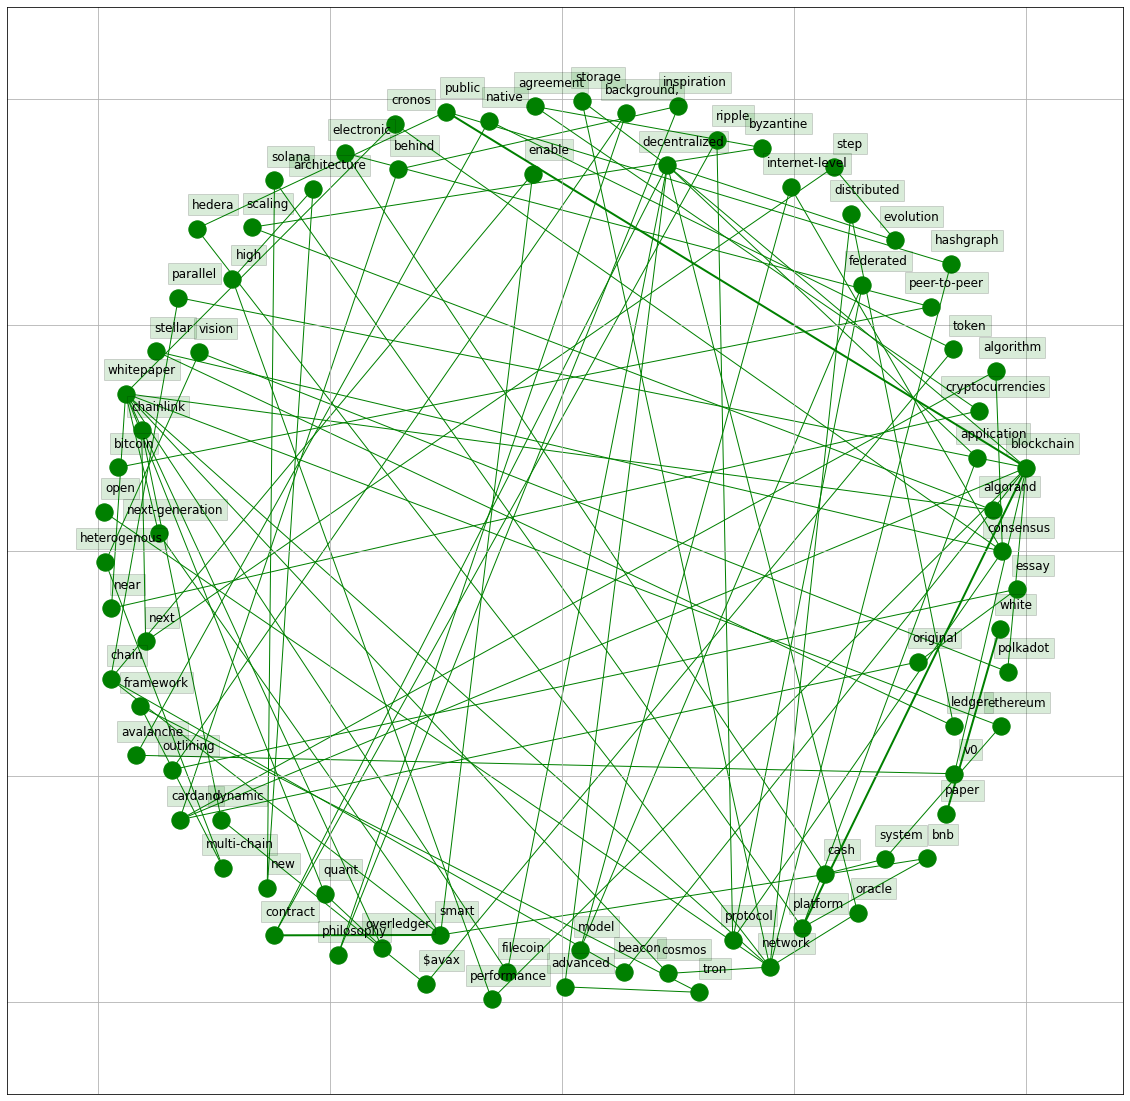

In [35]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [36]:
import igviz as ig

In [37]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [38]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-38-360256bff3c0>:1: DeprecationWarning: Argument `titlefont_size` is deprecated and will be removed in 0.6.0.
  fig = ig.plot(


## 2.2. Abstract

In [61]:
df_Abstract = df['Abstract'].str.lower()

In [62]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

" purely peer-to-peer version of electronic cash would allow online payments to be sent directly from one party to another without going through financial institution   digital signatures provide part of the solution  but the main benefits are lost if trusted third party is still required to prevent double-spending  we propose solution to the double-spending problem using peer-to-peer network  the network timestamps transactions by hashing them into an ongoing chain of hash-based proof-of-work  forming record that cannot be changed without redoing the proof-of-work   the longest chain not only serves as proof of the sequence of events witnessed  but proof that it came from the largest pool of cpu power   as long as majority of cpu power is controlled by nodes that are not cooperating to attack the network  they'll generate the longest chain and outpace attackers   the network itself requires minimal structure   messages are broadcast on best effort basis  and nodes can leave and rejoin

In [63]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [64]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [65]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [66]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['purely',
 'peer-to-peer',
 'version',
 'of',
 'electronic',
 'cash',
 'would',
 'allow',
 'online',
 'payment',
 'to',
 'be',
 'sent',
 'directly',
 'from',
 'one',
 'party',
 'to',
 'another',
 'without',
 'going',
 'through',
 'financial',
 'institution',
 'digital',
 'signature',
 'provide',
 'part',
 'of',
 'the',
 'solution',
 'but',
 'the',
 'main',
 'benefit',
 'are',
 'lost',
 'if',
 'trusted',
 'third',
 'party',
 'is',
 'still',
 'required',
 'to',
 'prevent',
 'double-spending',
 'we',
 'propose',
 'solution',
 'to',
 'the',
 'double-spending',
 'problem',
 'using',
 'peer-to-peer',
 'network',
 'the',
 'network',
 'timestamps',
 'transaction',
 'by',
 'hashing',
 'them',
 'into',
 'an',
 'ongoing',
 'chain',
 'of',
 'hash-based',
 'proof-of-work',
 'forming',
 'record',
 'that',
 'cannot',
 'be',
 'changed',
 'without',
 'redoing',
 'the',
 'proof-of-work',
 'the',
 'longest',
 'chain',
 'not',
 'only',
 'serf',
 'a',
 'proof',
 'of',
 'the',
 'sequence',
 'of',
 'event',

In [67]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','e','g','drb','ha','per']]
words_nsw

['purely',
 'peer-to-peer',
 'version',
 'electronic',
 'cash',
 'would',
 'allow',
 'online',
 'payment',
 'sent',
 'directly',
 'one',
 'party',
 'another',
 'without',
 'going',
 'financial',
 'institution',
 'digital',
 'signature',
 'provide',
 'part',
 'solution',
 'main',
 'benefit',
 'lost',
 'trusted',
 'third',
 'party',
 'still',
 'required',
 'prevent',
 'double-spending',
 'propose',
 'solution',
 'double-spending',
 'problem',
 'using',
 'peer-to-peer',
 'network',
 'network',
 'timestamps',
 'transaction',
 'hashing',
 'ongoing',
 'chain',
 'hash-based',
 'proof-of-work',
 'forming',
 'record',
 'cannot',
 'changed',
 'without',
 'redoing',
 'proof-of-work',
 'longest',
 'chain',
 'serf',
 'proof',
 'sequence',
 'event',
 'witnessed',
 'proof',
 'came',
 'largest',
 'pool',
 'cpu',
 'power',
 'long',
 'majority',
 'cpu',
 'power',
 'controlled',
 'node',
 'cooperating',
 'attack',
 'network',
 "they'll",
 'generate',
 'longest',
 'chain',
 'outpace',
 'attacker',
 'netwo

In [68]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [69]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0              (smart, contract)      27
1             (technical, paper)       8
2               (digital, asset)       6
3         (consensus, algorithm)       6
4          (blockchain, network)       6
5   (decentralized, application)       5
6             (virtual, machine)       5
7           (public, blockchain)       5
8                  (cosmos, hub)       5
12                 (per, second)       4
14  (decentralised, application)       4
13        (byzantine, agreement)       4
11            (transaction, per)       4
10    (blockchain, architecture)       4
9                (beacon, chain)       4
22               (native, token)       3
29       (development, platform)       3
28             (payment, scheme)       3
27            (storage, network)       3
26                (zone, cosmos)       3
25    (distributed, application)       3
24     (blockchain, application)       3
23                   (end, user)       3
20                (proof, stake)       3
19             (new, blockchain)       3

In [70]:
print(abstract_bigram.head(90).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                           bigram &  counts \\
\midrule
                (smart, contract) &      27 \\
               (technical, paper) &       8 \\
                 (digital, asset) &       6 \\
           (consensus, algorithm) &       6 \\
            (blockchain, network) &       6 \\
     (decentralized, application) &       5 \\
               (virtual, machine) &       5 \\
             (public, blockchain) &       5 \\
                    (cosmos, hub) &       5 \\
                    (per, second) &       4 \\
     (decentralised, application) &       4 \\
           (byzantine, agreement) &       4 \\
               (transaction, per) &       4 \\
       (blockchain, architecture) &       4 \\
                  (beacon, chain) &       4 \\
                  (native, token) &       3 \\
          (development, platform) &       3 \\
                (payment, scheme) &       3 \\
               (storage, network) &       3 \\
                   (zo

In [71]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                           |   counts |
|:---------------------------------|---------:|
| ('smart', 'contract')            |       27 |
| ('technical', 'paper')           |        8 |
| ('digital', 'asset')             |        6 |
| ('consensus', 'algorithm')       |        6 |
| ('blockchain', 'network')        |        6 |
| ('decentralized', 'application') |        5 |
| ('virtual', 'machine')           |        5 |
| ('public', 'blockchain')         |        5 |
| ('cosmos', 'hub')                |        5 |
| ('per', 'second')                |        4 |
| ('decentralised', 'application') |        4 |
| ('byzantine', 'agreement')       |        4 |
| ('transaction', 'per')           |        4 |
| ('blockchain', 'architecture')   |        4 |
| ('beacon', 'chain')              |        4 |
| ('native', 'token')              |        3 |
| ('development', 'platform')      |        3 |
| ('payment', 'scheme')            |        3 |
| ('storage', 'network')           |    

In [72]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [73]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [74]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count/10)

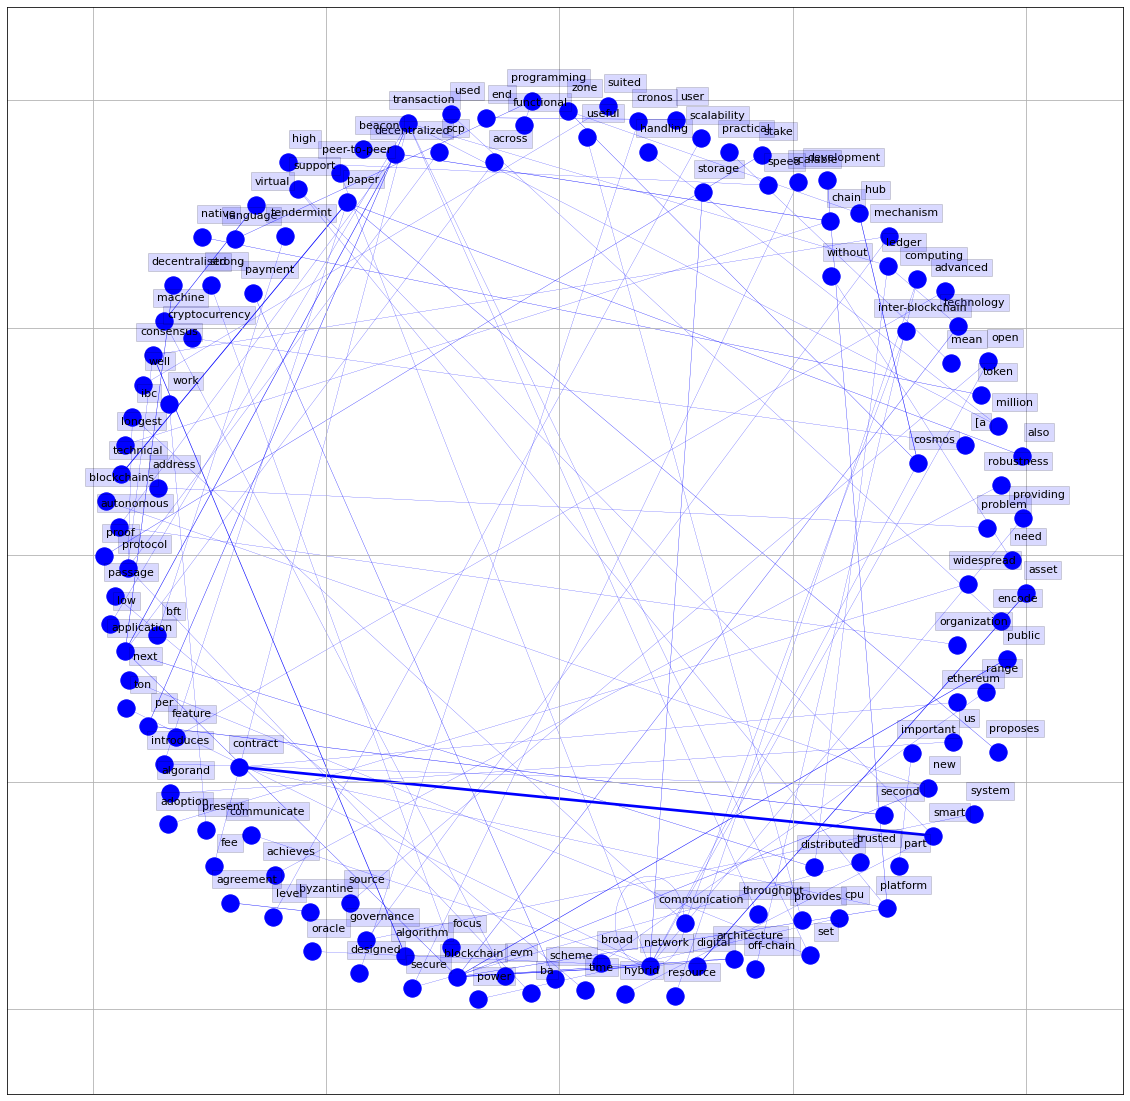

In [75]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)
    
plt.show()

In [76]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [77]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-77-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

